In [6]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('alturas-pesos-train.csv')

In [10]:
df[:10]

,Genero,Peso,Altura
0,Mujer,60,160
1,Hombre,95,180
2,Hombre,75,170
3,Mujer,55,160
4,Mujer,55,150
5,Mujer,60,160
6,Hombre,80,175
7,Mujer,70,170
8,Mujer,55,155
9,Hombre,85,180


In [11]:
len(df)

8000

# Modelos en Machine Learning
- Generación
- Clasificación
- Regresión

# Tenemos 3 V.A: Género, Peso, Altura

## Género: V.A de Bernoulli

In [5]:
genero = df['Genero']
print(genero)

0        Mujer
1       Hombre
2       Hombre
3        Mujer
4        Mujer
5        Mujer
6       Hombre
7        Mujer
8        Mujer
9       Hombre
10       Mujer
11      Hombre
12      Hombre
13       Mujer
14       Mujer
15      Hombre
16       Mujer
17       Mujer
18       Mujer
19       Mujer
20       Mujer
21       Mujer
22       Mujer
23      Hombre
24      Hombre
25      Hombre
26      Hombre
27       Mujer
28       Mujer
29       Mujer
         ...  
7970     Mujer
7971     Mujer
7972     Mujer
7973    Hombre
7974    Hombre
7975    Hombre
7976    Hombre
7977     Mujer
7978    Hombre
7979     Mujer
7980    Hombre
7981    Hombre
7982    Hombre
7983    Hombre
7984     Mujer
7985     Mujer
7986     Mujer
7987    Hombre
7988     Mujer
7989    Hombre
7990     Mujer
7991    Hombre
7992    Hombre
7993    Hombre
7994    Hombre
7995     Mujer
7996    Hombre
7997    Hombre
7998     Mujer
7999    Hombre
Name: Genero, Length: 8000, dtype: object


### Cual es el parámetro p?

In [13]:
p_hombre = (genero == 'Hombre').sum()/len(genero)
p_mujer = (genero == 'Mujer').sum()/len(genero)
print(p_hombre, p_mujer)

0.50025 0.49975


In [14]:
from matplotlib import pyplot as plt

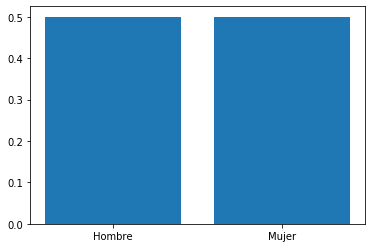

In [15]:
plt.bar(['Hombre', 'Mujer'], [0.50025, 0.49975])
plt.show()

Espacio muestral:

In [16]:
['Hombre', 'Mujer']

['Hombre', 'Mujer']

## Peso: V.A categórica

In [17]:
from collections import Counter

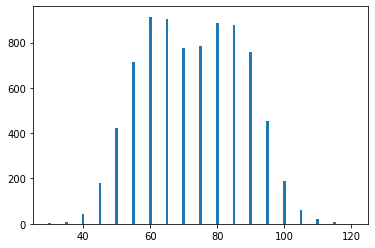

In [20]:
peso =  df['Peso']
peso_frecuencia = dict(Counter(peso))
plt.bar(peso_frecuencia.keys(), peso_frecuencia.values())
plt.show()

In [22]:
print(peso_frecuencia)

{60: 914, 95: 452, 75: 786, 55: 712, 80: 887, 70: 777, 85: 877, 65: 903, 40: 45, 50: 421, 90: 757, 30: 2, 45: 180, 110: 20, 100: 189, 105: 62, 35: 7, 115: 8, 120: 1}


In [19]:
peso_frecuencia[65]

903

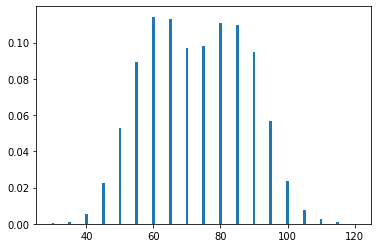

In [25]:
peso_prob = {pe:c/len(peso) for pe, c in peso_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

In [26]:
print(peso_prob)

{60: 0.11425, 95: 0.0565, 75: 0.09825, 55: 0.089, 80: 0.110875, 70: 0.097125, 85: 0.109625, 65: 0.112875, 40: 0.005625, 50: 0.052625, 90: 0.094625, 30: 0.00025, 45: 0.0225, 110: 0.0025, 100: 0.023625, 105: 0.00775, 35: 0.000875, 115: 0.001, 120: 0.000125}


In [27]:
peso_prob[65]

0.112875

Espacio Muestral:

In [28]:
np.sort(list(peso_prob.keys()))

array([ 30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,
        95, 100, 105, 110, 115, 120])

## Altura: V.A categórica

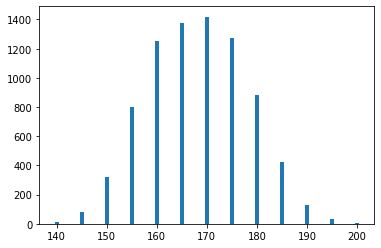

In [30]:
altura =  df['Altura']
altura_frecuencia = dict(Counter(altura))
plt.bar(altura_frecuencia.keys(), altura_frecuencia.values())
plt.show()

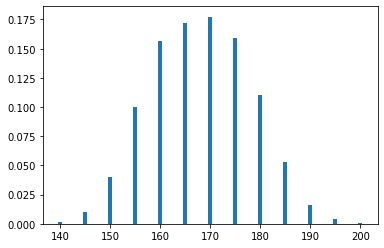

In [33]:
altura_prob = {al:c/len(altura) for al, c in altura_frecuencia.items()}
plt.bar(altura_prob.keys(), altura_prob.values())
plt.show()

In [34]:
altura_prob[170]

0.177375

Espacio muestral

In [35]:
np.sort(list(altura_frecuencia.keys()))

array([140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200])

# V.A Marginales
Cada V.A independiente de los valores que toman las otras

# Modelos generadores:

In [36]:
peso_gen = np.random.choice(list(peso_prob.keys()), size = 100, p = list(peso_prob.values()))
print(peso_gen)

[ 85  75  85 105  65  90  95  85  70  50  45  65  50  85  75  85  70 115
  60  75  70  80  65 100  75  70  80  85  50  85  85  75  85  75  75  55
  80  75  50  80  70  65  50  55  85  90  55  95  65  75  95  55  65  60
  80  70  65  65  75  60  80  90  55  95  50  80  70  60  80  90  90  70
  55  70  80  70  80  65  95  75  65  65  50  70  65  90  85  75  90  70
  60  80  80  65  55  55  60  60  75  60]


In [38]:
alt_gen = np.random.choice(list(altura_prob.keys()), size = 100, p = list(altura_prob.values()))
print(alt_gen)

[155 165 175 165 155 160 170 180 160 170 155 150 180 160 175 150 175 155
 155 170 155 160 175 175 180 165 180 175 160 165 175 185 165 180 170 155
 170 160 175 160 170 170 170 165 160 160 185 170 185 165 160 170 170 165
 175 165 195 160 165 170 175 160 170 180 160 160 190 165 190 155 180 160
 175 160 185 165 170 160 145 160 170 180 165 155 165 150 165 160 180 175
 160 160 160 180 180 160 165 165 175 175]


### Tiene sentido ahora armar conjunto de pesos, alturas generando de esta forma? Son independientes?

In [39]:
pesos_alts = np.array([list(peso_gen), list(alt_gen)]).T
pesos_alts[:10]

array([[ 85, 155],
       [ 75, 165],
       [ 85, 175],
       [105, 165],
       [ 65, 155],
       [ 90, 160],
       [ 95, 170],
       [ 85, 180],
       [ 70, 160],
       [ 50, 170]])

# Asi se generaron los pesos y alturas con baja precisión
No hace falta correr estas celdas

In [101]:
ap = pd.read_csv('alturas-pesos-mils-train.csv')

In [102]:
pesos_rounded = (np.round(ap['Peso'].values/5)*5).astype(int)
alturas_rounded = (np.round(ap['Altura'].values/5)*5).astype(int)

In [103]:
alturas_rounded

array([160, 180, 170, ..., 170, 165, 170])

In [104]:
ap_rounded = ap.copy()

In [105]:
ap_rounded['Peso'] = pesos_rounded
ap_rounded['Altura'] = alturas_rounded

In [106]:
ap_final = ap_rounded[['Genero','Peso', 'Altura']].copy()

In [107]:
ap_final.to_csv('alturas-pesos-train.csv',index=False)